# Introduction to Machine Learning - Fall 2022
# Mehran Mazaheri - 98102346

---

## Computer Assignment 1 <br>
Instructor: Sajjad Amini <br>
Assistant: Kiarash Vaziri <br>

---



# *💰 Bitcoin Market Summary*

In [21]:
# PACKAGES
import math
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size':18})

C:\Users\Mehran\AppData\Local\Temp\ipykernel_13548\4211670106.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in current_values])


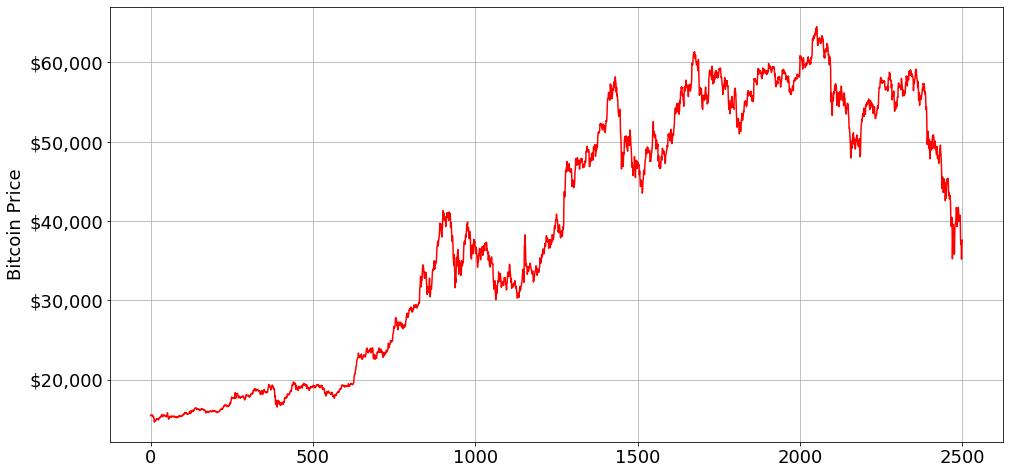

In [ ]:
# Plot market summary of bitcoin
btc_price = np.load("btc_price.npy")
plt.plot(btc_price, color='red', lw=1.5)
plt.ylabel('Bitcoin Price')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in current_values])
plt.grid()
plt.show()

C:\Users\Mehran\AppData\Local\Temp\ipykernel_13548\2271678137.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in current_values])


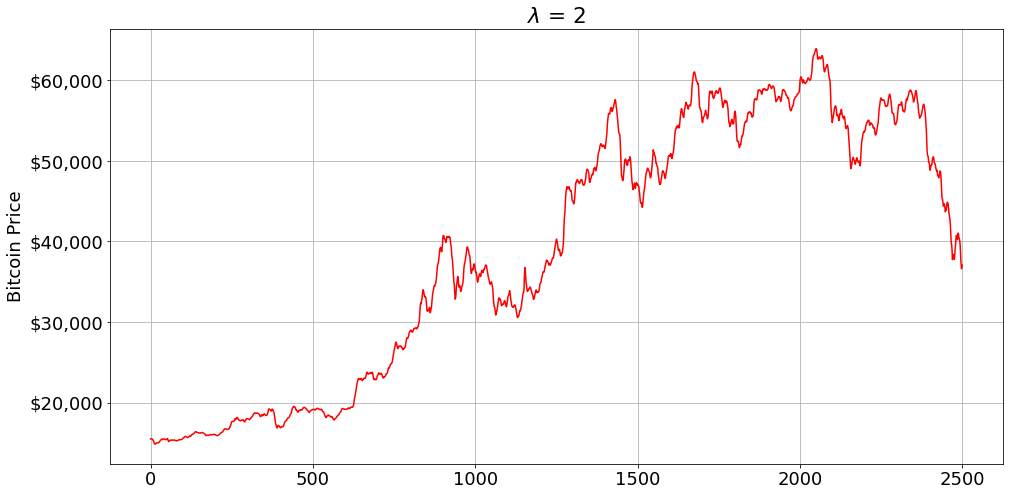

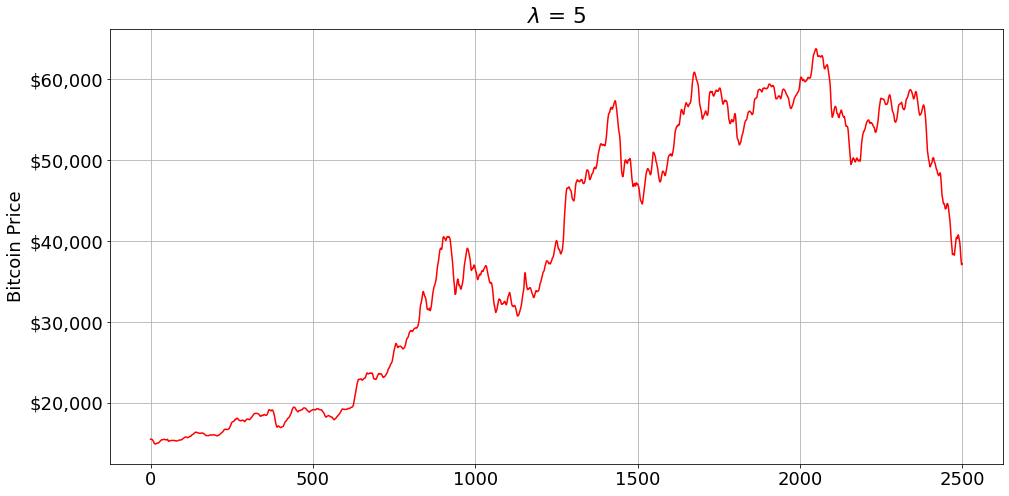

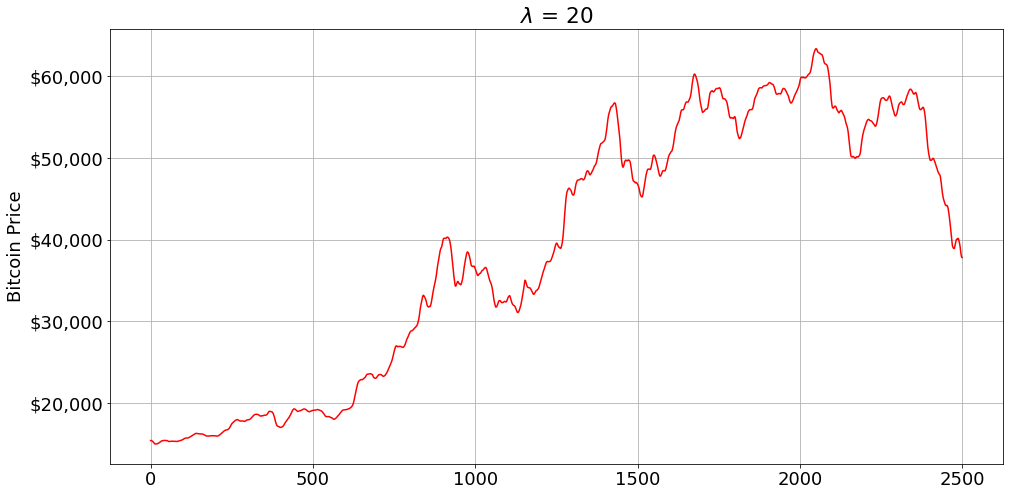

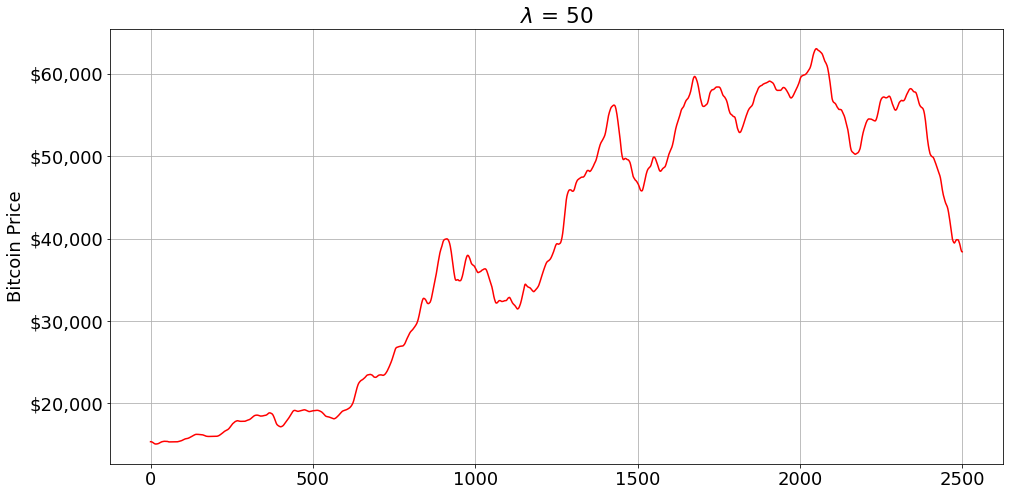

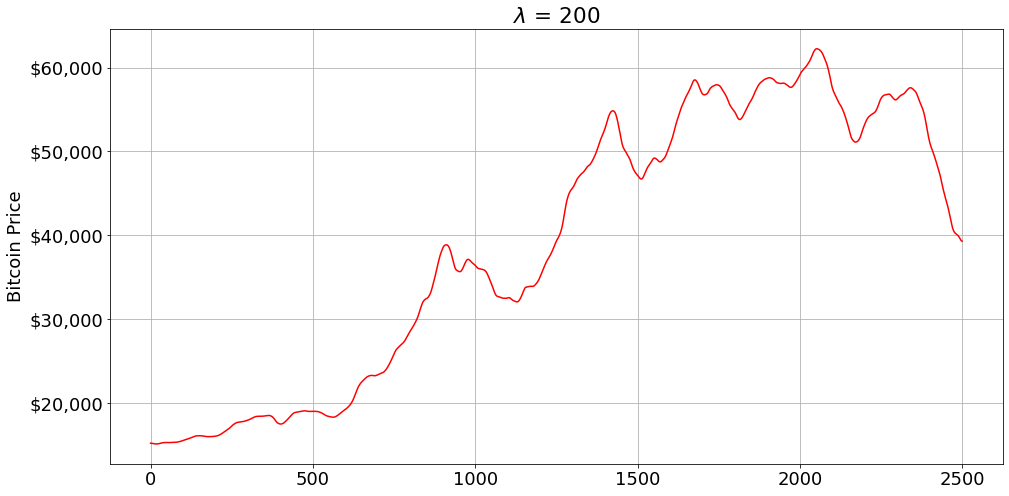

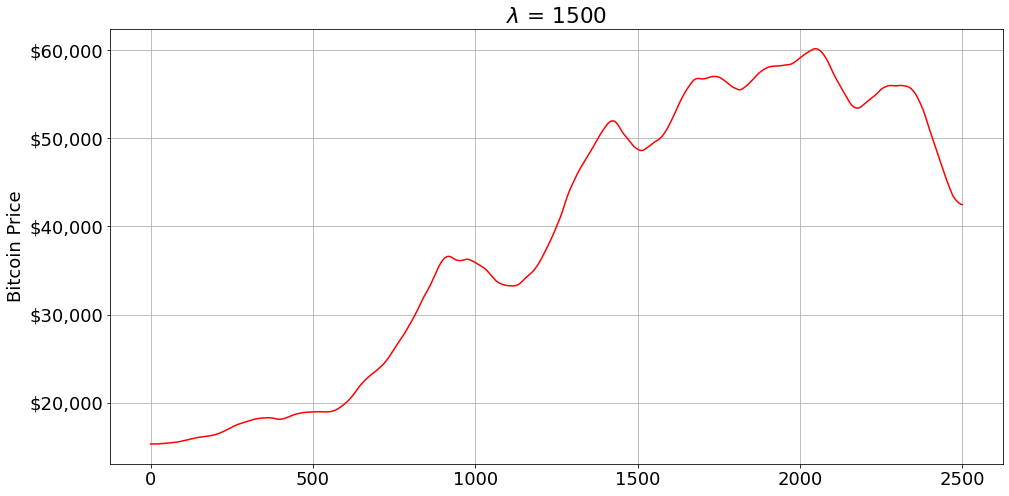

In [85]:
# DENOISING THE PRICE TAGS
lambdas = [2,5,20,50,200,1500]
n = np.size(btc_price,0)
D = np.eye(N=n-1,M=n)
D[([i for i in range(n-1)], [i+1 for i in range(n-1)])] = -1
y = np.zeros(shape=(2*n-1, 1),dtype=btc_price.dtype)
y[:n,0] = btc_price
for l in lambdas:
    A = np.concatenate((np.eye(n,dtype=btc_price.dtype),np.sqrt(l)*D), axis = 0)
    x = np.linalg.lstsq(A,y,rcond=None)[0]
    plt.figure
    plt.plot(x, color='red', lw=1.5)
    plt.ylabel('Bitcoin Price')
    plt.title(f'$\lambda$ = {l}')
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in current_values])
    plt.grid()
    plt.show()


How does the parameter $\lambda$ change the plots?<br>
For which value of $\lambda$ the data looks more realistic (denoised)?

---
Answer: increasing $\lambda$ causes more smoother plot with eliminated fluctuation(denoised more) but on the other hand, this may lead to losing decisive information (genuine fluctuation).<br>
plots with very small $\lambda$ are still noisy and plots with very large $\lambda$ doesn't incorporate demanded information from early data. in my opinion plots with $\lambda$=20 and $\lambda$=50 are more realistic(both denoised and informative)


# *🛥️ Hutchinson*


In [ ]:
# PACKAGES
import matplotlib.pyplot as plt
import numpy as np
!pip install tqdm
from tqdm import tqdm 

plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size':18})

In [3]:
p = np.random.normal(loc=0,scale=1,size=(5,4))

In [23]:
def hutchinson1(A, m):
    """
      Hutchinson's estimator.
      Args:
          A: target symmetric matrix, size n x n
          m: # standard normal random vectors 
      Returns: estimated trace
    """
    # Write your code here
    tr = 0
    n = np.size(A,axis=0)
    for i in range(m):
        p = np.random.normal(loc=0,scale=1,size=(n,1))
        tr += np.trace(np.matmul(np.matmul(p.T,A),p))
    tr /= m
    return tr

def hutchinson2(A, m):
    """
    Hutchinson's estimator.
    Args:
        A: target symmetric matrix, size n x n
        m: # random sign vectors 
    Returns: estimated trace
    """
    # Write your code here
    n = np.size(A,axis=0)
    tr = 0
    for i in range(m):
        p = 2*np.random.binomial(n = 1, p=0.5,size=(n,1)) - 1
        tr += np.trace(np.matmul(np.matmul(p.T,A),p))
    tr /= m
    return tr    

In [24]:
def relative_error(true, est):
  return np.abs((est-true)/true)

In [26]:
# Test and evalutate the estimators
# DO NOT CHANGE ANYTHING IN THIS CELL
num_test = 500
errors1 = []
errors2 = []

m = 10000

for i in tqdm(range(num_test), desc='Running tests'):
    n = np.random.randint(10, 15)
    A = np.random.randn(n,n)
    A = (A + A.transpose()) / 2
    tr_est1 = hutchinson1(A, m)
    tr_est2 = hutchinson2(A, m)
    tr_true = np.trace(A)
    errors1.append(relative_error(tr_true, tr_est1))
    errors2.append(relative_error(tr_true, tr_est2))

# Report the errors statistically
print(f"Random vectors: standard normal, m={m}:")
print(f"Relative error = {np.mean(errors1)} +- {np.std(errors1)}")

print(f"Random vectors: sign, m={m}:")
print(f"Relative error = {np.mean(errors2)} +- {np.std(errors2)}")

Running tests: 100%|██████████| 500/500 [02:57<00:00,  2.82it/s]

Random vectors: standard normal, m=10000:
Relative error = 0.09130052804094364 +- 0.24391055217411653
Random vectors: sign, m=10000:
Relative error = 0.09911474651475402 +- 0.33946438777214044


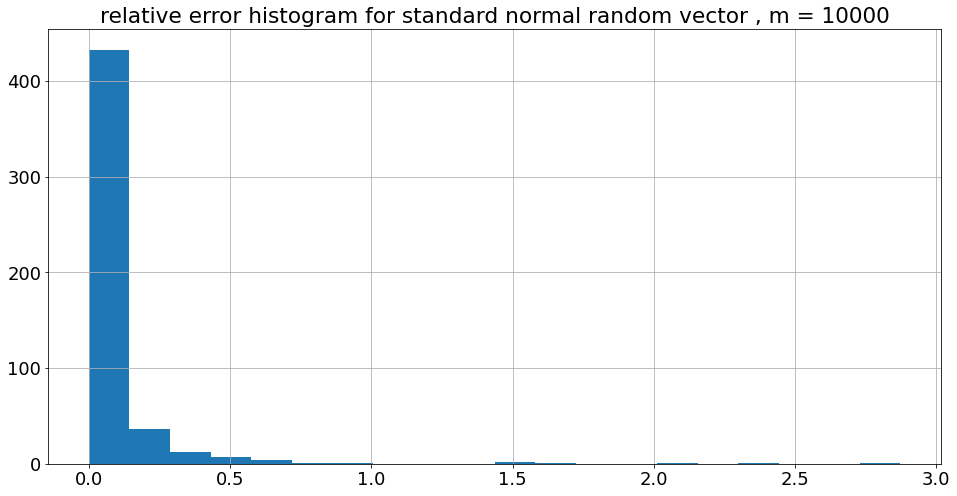

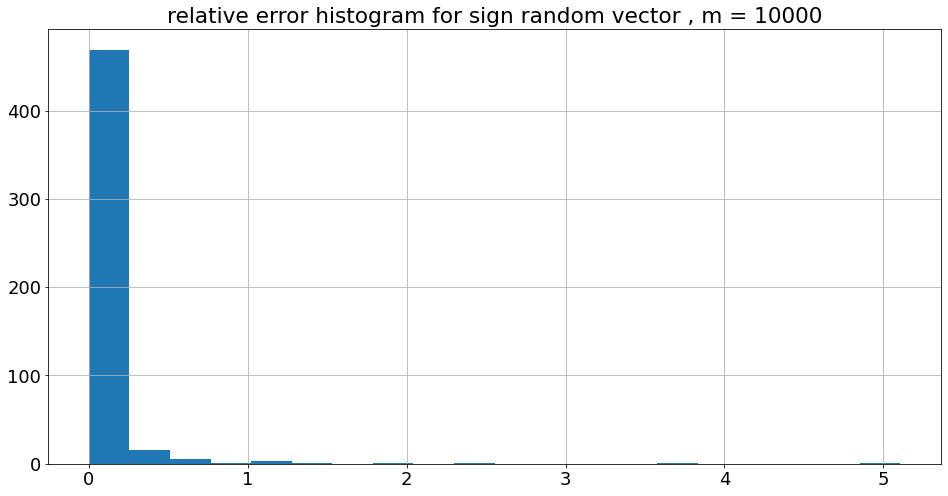

In [27]:
# Plot the histograms
# You can use pandas and/or seaborn libraries

# Write your code here
plt.figure
plt.hist(errors1, bins=20)
plt.title(f'relative error histogram for standard normal random vector , m = {m}')
plt.grid()
plt.show()
plt.figure
plt.hist(errors2, bins=20)
plt.title(f'relative error histogram for sign random vector , m = {m}')
plt.grid()
plt.show()